In [1]:
import simspace as ss
import numpy as np
import pandas as pd

In [ ]:
# Step 0: Load the reference metadata and omics data.
# This step is necessary to calculate the spatial parameters for the simulation.
meta = pd.read_csv('/Users/zhaotianxiao/Library/CloudStorage/Dropbox/FenyoLab/Project/Spatialsim/SimSpace/data/reference_metadata.csv',
                   index_col=0)

# Step 1: Calculate the spatial parameters from the reference metadata.
# This step uses the metadata to calculate the spatial parameters for the simulation.
# The parameters include the Moran's I and local entropy, which are used to simulate the spatial omics data.
# The Moran's I is further sorted by the cell type abundance.

mi_sim = ss.spatial.integrate_morans_I(meta['Cluster'], meta[['x_centroid', 'y_centroid']], meta['Cluster'].unique())
cell_counts = meta['Cluster'].value_counts().sort_index()
mi_sim = np.array([mi_sim[i] for i in np.argsort(-cell_counts)])
le_sim = ss.spatial.calculate_local_entropy(meta['Cluster'], meta[['x_centroid', 'y_centroid']])
le_pdf, _ = np.histogram(le_sim, bins=[x / 4 for x in range(0, 12)], density=True)

# Combine the local entropy and Moran's I into a single result to use as the target for the simulation.
sim_res = np.hstack((le_pdf, mi_sim))

In [ ]:
# Step 2: Fit the spatial parameters using the target data.
# This step uses the target data to fit the spatial parameters for the simulation.
# The fitting process uses a genetic algorithm to optimize the parameters.
# The parameters include the number of groups, states, and other simulation settings.

fitted_params = ss.spatial_fit(
    target=sim_res,
    population_size=20, # Population size for the genetic algorithm
    generations=10,     # Number of generations for the genetic algorithm
    shape=(80, 80),     # Shape of the simulated spatial data
    n_group=2,          # Number of groups in the simulation
    n_state=9,          # Number of states in the simulation
    replicate=1,        # Number of replicates for the simulation; one replicate is sufficient for this example, but can be increased for more robust results
    seed=0,             # Random seed for reproducibility
)

Generation 0: Best Fitness = 0.8865341823928504
Generation 1: Best Fitness = 0.7345467491828108
Generation 2: Best Fitness = 0.7345467491828108
Generation 3: Best Fitness = 0.7345467491828108
Generation 4: Best Fitness = 0.7345467491828108
Generation 5: Best Fitness = 0.7345467491828108
Generation 6: Best Fitness = 0.7345467491828108
Generation 7: Best Fitness = 0.7345467491828108
Generation 8: Best Fitness = 0.7345467491828108
Generation 9: Best Fitness = 0.7345467491828108
Optimization complete!
Best solution: {'n_group': 2, 'n_state': 9, 'niche_theta': array([0.44650192]), 'theta_list': [array([-0.23788805,  0.14410818, -0.65546195, -0.53543666,  0.46746016,
        0.16297951, -0.42029195,  0.63835194,  0.33794159,  0.6070672 ,
        0.42238894, -0.42500922, -0.61284523, -0.58728033, -0.33537799,
        0.45484526,  0.61651146,  0.50322044,  0.17606711, -0.34819478,
        0.24709473,  0.41157442, -0.13967493, -0.56440546,  0.00303249,
       -0.41817377, -0.01151323,  0.221208

In [ ]:
# Step 3: Simulate the spatial omics data using the fitted parameters, similar as the reference-free simulation.
sim = ss.util.sim_from_params(
    fitted_params,
    shape=(80, 80),
    num_iteration=4,
    n_iter=6,
    custom_neighbor=ss.spatial.generate_offsets(3),
    seed=42
)

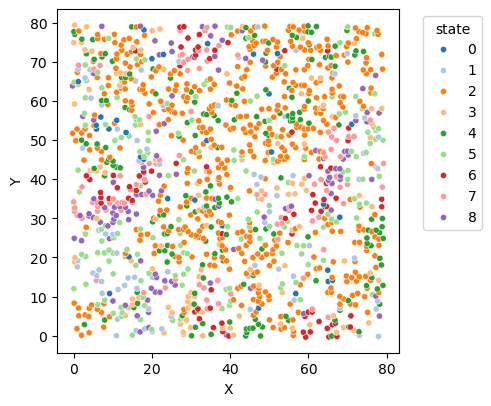

In [13]:
sim.plot(dpi=100, figsize=(5,5), title='Simulation Result')